# A simple example to demonstrate Pandas data frames

[Pandas](https://pandas.pydata.org/) is a data analysis library for Python. The aim of this notebook is to read the summary page of the [Living Review of Machine Learning for Particle Physics](https://iml-wg.github.io/HEPML-LivingReview/) into a pandas data frame and perform some basic statistical analysis. We will read in the text and process with a language processing toolkit 'nltk'.

We will try to answer the following questions

* How many articles are included in the reivew?
* What are the most common words in the article titles?
* How do the trends in common terms change with arxiv date?


In [1]:
import re
import string
# natural language toolkit
import nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

STOP_WORDS = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
%matplotlib inline

In [17]:
# if using google colab
!git clone https://github.com/enocera/FIS0204.git

fatal: destination path 'FIS0204' already exists and is not an empty directory.


In [25]:
import sys
sys.path.append('/content/FIS0204/Lectures/Lecture_08/PandasExample/')
%cd /content/FIS0204/Lectures/Lecture_08/PandasExample/

/content/FIS0204/Lectures/Lecture_08/PandasExample


* First we defining a function which will clean spurious/useless text from each line

In [27]:
def cleaning(text):
    """
    Convert to lowercase.
    remove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """

    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text

In [28]:
# README.md taken from https://github.com/iml-wg/HEPML-LivingReview
with open('README.md', 'r') as file:
        data = file.read()

* Now read the whole file into a Pandas data frame which is split by line breaks

In [29]:
df = pd.DataFrame([x.split(';') for x in data.split('\n')])

* Let's see what we've got with df.info()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1608 non-null   object
 1   text    1608 non-null   object
dtypes: object(2)
memory usage: 25.2+ KB


From this we can see the number of lines and look at the their contents using df[<data #>]. From the line-by-line split there is only 1 data entry with two columns: line number and the text from that line

In [28]:
df[0]

0       #  **A Living Review of Machine Learning for P...
1                                                        
2       *Modern machine learning techniques, including...
3                                                        
4       [![download](https://img.shields.io/badge/down...
                              ...                        
1603                                                     
1604    * [Measurement of lepton-jet correlation in de...
1605    * [Unbinned Deep Learning Jet Substructure Mea...
1606                                                     
1607                                                     
Name: 0, Length: 1608, dtype: object

The Length is indicative of the number of articles but not exactly since there are alse section headings and other descriptions included.

Q: Can you filter the text to find the number of articles?

## Counting occurances of keywords

In [29]:
# Now put everything in lower case
df['text'] = df[0].str.lower()

In [32]:
# and filter the words according to the rules definied above
dt = df['text'].apply(cleaning)

In [46]:
# now we can split into words and count the frequency
word_count = Counter(" ".join(dt).split()).most_common(30)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
print(word_frequency)

              Word  Frequency
0         learning        414
1           neural        261
2          machine        254
3         networks        219
4          physics        202
5             deep        166
6              jet        142
7         particle        116
8           energy        105
9          network         91
10             lhc         84
11           graph         79
12  reconstruction         78
13            high         73
14      generative         73
15       detection         72
16           event         64
17  classification         59
18         anomaly         58
19          models         55
20         tagging         54
21            data         52
22      simulation         50
23        detector         50
24            fast         50
25            jets         48
26        collider         47
27      collisions         47
28         quantum         46
29          search         45


# Looking at the appearance of keywords over time

For this analysis, a new file was prepared by passing regular expression pattern matching on the original README.md using vim.

Exercise: Achieve the same result processing only in Python

In [47]:
# process README.md in vim using
# :g!/\* \[/d
# :%s/* \[\([^]]*\)\]([^0-9]*.\([0-9][0-9]\)\([0-9][0-9]\).[0-9]*).*$/"\1", \2, \3/
# :%s/^\s*//
# :g/\*/d
# add top line - title, year, month
# save as READMEtest.md
df2 = pd.read_csv('READMEtest.md')

In [48]:
# thanks to the better formatting read_csv finds the column structure and
# assigns the names accorinding to the headings provided
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1320 non-null   object
 1    year   1320 non-null   int64 
 2    month  1320 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 31.1+ KB


In [49]:
# watch out for the space in ' year' and ' month' - bad preprocessing. Can you fix it?
df2['title-clean'] = df2['title'].apply(cleaning)
df2['date'] = df2[' year'] + (df2[' month']-1)/12

In [75]:
# filter by year using df.drop top look at the last year only
df2filter_test  = df2.drop(df2[df2[' year']<23].index)[['title-clean','date']]
df2filter_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 40 to 1319
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title-clean  314 non-null    object 
 1   date         314 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.4+ KB


In [56]:
# this is the list of words from before:
word_frequency['Word']

0           learning
1             neural
2            machine
3           networks
4            physics
5               deep
6                jet
7           particle
8             energy
9            network
10               lhc
11             graph
12    reconstruction
13              high
14        generative
15         detection
16             event
17    classification
18           anomaly
19            models
20           tagging
21              data
22        simulation
23          detector
24              fast
25              jets
26          collider
27        collisions
28           quantum
29            search
Name: Word, dtype: object

In [52]:
# now we can filter by common title keywords
df2filter1 = df2.drop(df2[df2['title-clean'].str.contains( word_frequency['Word'][0] )==False].index)
df2filter2 = df2.drop(df2[df2['title-clean'].str.contains( word_frequency['Word'][6] )==False].index)
df2filter3 = df2.drop(df2[df2['title-clean'].str.contains( word_frequency['Word'][16] )==False].index)
df2filter4 = df2.drop(df2[df2['title-clean'].str.contains( word_frequency['Word'][21] )==False].index)
df2filter5 = df2.drop(df2[df2['title-clean'].str.contains( word_frequency['Word'][24] )==False].index)

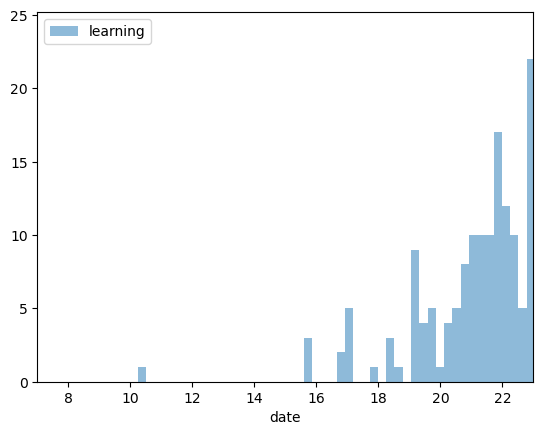

In [53]:
# we can plot the most common word 
plt.hist(df2filter1['date'], density=False, bins=50, alpha=0.5, label=word_frequency['Word'][0])
plt.xlim([7,23])
plt.xlabel('date')
plt.legend(loc='upper left')

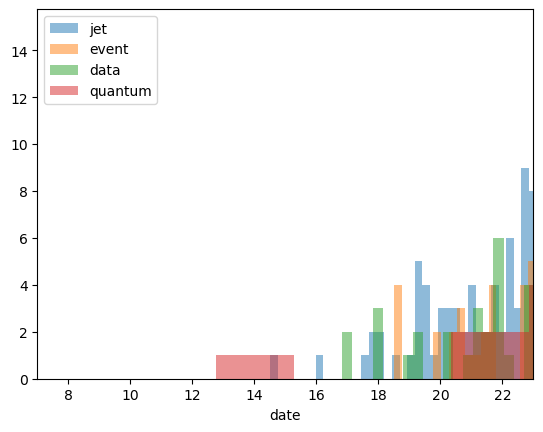

In [54]:
plt.hist(df2filter2['date'], density=False, bins=200, alpha=0.5, label=word_frequency['Word'][6])
plt.hist(df2filter3['date'], density=False, bins=20, alpha=0.5, label=word_frequency['Word'][16])
plt.hist(df2filter4['date'], density=False, bins=20, alpha=0.5, label=word_frequency['Word'][21])
plt.hist(df2filter5['date'], density=False, bins=20, alpha=0.5, label=word_frequency['Word'][28])
plt.xlim([7,23])
plt.xlabel('date')
plt.legend(loc='upper left')